In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-29 15:08:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.12.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.8s    

2023-07-29 15:08:50 (18.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [2]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [3]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

['947246.jpg']
Image shape: (512, 512, 3)


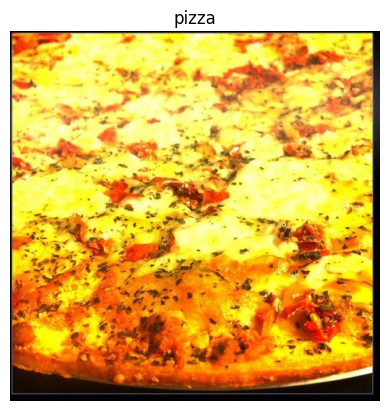

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[255, 214,  86],
        [254, 213,  87],
        [254, 210,  89],
        ...,
        [130,  27,  31],
        [133,  30,  34],
        [135,  32,  36]],

       [[249, 208,  80],
        [251, 210,  84],
        [255, 211,  90],
        ...,
        [129,  26,  30],
        [131,  28,  32],
        [133,  30,  34]],

       [[249, 208,  82],
        [250, 209,  85],
        [255, 210,  91],
        ...,
        [129,  26,  29],
        [131,  28,  32],
        [132,  29,  33]],

       ...,

       [[249, 156,  35],
        [250, 157,  36],
        [251, 158,  37],
        ...,
        [242, 148,  52],
        [234, 139,  45],
        [226, 131,  37]],

       [[250, 155,  35],
        [251, 156,  36],
        [252, 157,  37],
        ...,
        [238, 144,  48],
        [228, 133,  39],
        [219, 124,  32]],

       [[249, 154,  34],
        [250, 155,  35],
        [251, 156,  36],
        ...,
        [236, 142,  4

In [ ]:
img.shape

(512, 382, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[1.        , 0.83921569, 0.3372549 ],
        [0.99607843, 0.83529412, 0.34117647],
        [0.99607843, 0.82352941, 0.34901961],
        ...,
        [0.50980392, 0.10588235, 0.12156863],
        [0.52156863, 0.11764706, 0.13333333],
        [0.52941176, 0.1254902 , 0.14117647]],

       [[0.97647059, 0.81568627, 0.31372549],
        [0.98431373, 0.82352941, 0.32941176],
        [1.        , 0.82745098, 0.35294118],
        ...,
        [0.50588235, 0.10196078, 0.11764706],
        [0.51372549, 0.10980392, 0.1254902 ],
        [0.52156863, 0.11764706, 0.13333333]],

       [[0.97647059, 0.81568627, 0.32156863],
        [0.98039216, 0.81960784, 0.33333333],
        [1.        , 0.82352941, 0.35686275],
        ...,
        [0.50588235, 0.10196078, 0.11372549],
        [0.51372549, 0.10980392, 0.1254902 ],
        [0.51764706, 0.11372549, 0.12941176]],

       ...,

       [[0.97647059, 0.61176471, 0.1372549 ],
        [0.98039216, 0.61568627, 0.14117647],
        [0.98431373, 0

# Convolutional neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
#set path to data directory
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
model_1=tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 158ms/step - loss: 0.6241 - accuracy: 0.6700 - val_loss: 0.4881 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4460 - accuracy: 0.7920 - val_loss: 0.3585 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4258 - accuracy: 0.8093 - val_loss: 0.3472 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3774 - accuracy: 0.8400 - val_loss: 0.3203 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3053 - accuracy: 0.8773 - val_loss: 0.3623 - val_accuracy: 0.8380


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0

# Using same model on different data.

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_2.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 143ms/step - loss: 2.1146 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_3.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 124ms/step - loss: 3.8721 - accuracy: 0.6460 - val_loss: 3.2895 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 1.3598 - accuracy: 0.7040 - val_loss: 0.5587 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.8743 - accuracy: 0.7307 - val_loss: 1.0011 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6623 - accuracy: 0.7507 - val_loss: 0.4830 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4911 - accuracy: 0.7853 - val_loss: 1.1409 - val_accuracy: 0.6620


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary Classification

1. Become one with the data

['1658186.jpg']
Image shape: (512, 512, 3)
['2827938.jpg']
Image shape: (512, 384, 3)


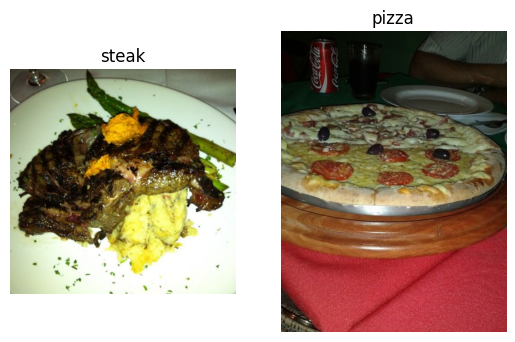

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

2.Preprocess the data

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,lables=train_data.next()
len(images),len(lables)

(32, 32)

In [ ]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

# Create CNN Model

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_4.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 155ms/step - loss: 0.6637 - accuracy: 0.6713 - val_loss: 0.5203 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5036 - accuracy: 0.7687 - val_loss: 0.4262 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3647 - accuracy: 0.8413 - val_loss: 0.3583 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2353 - accuracy: 0.9080 - val_loss: 0.3606 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.1168 - accuracy: 0.9680 - val_loss: 0.4089 - val_accuracy: 0.8340


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.3623 - accuracy: 0.8380


[0.3623386025428772, 0.8379999995231628]

Evaluating our model

<Axes: >

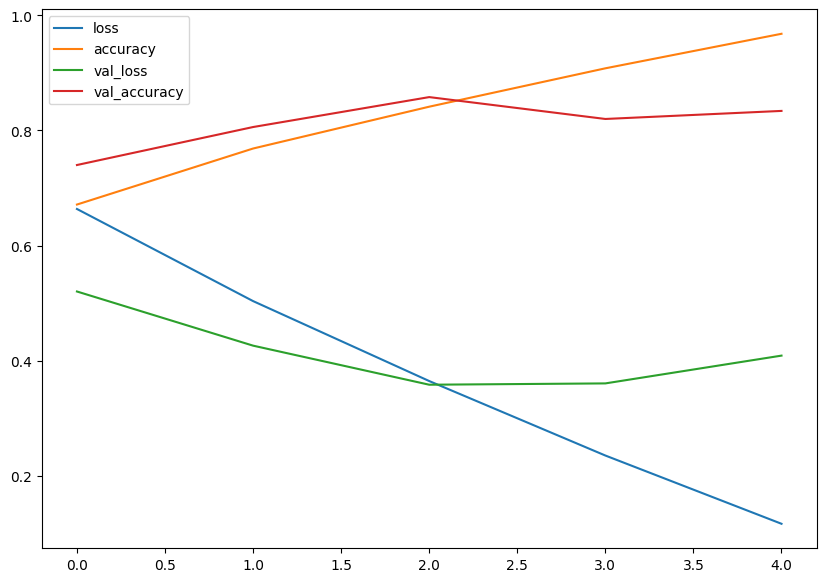

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [6]:
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuacy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


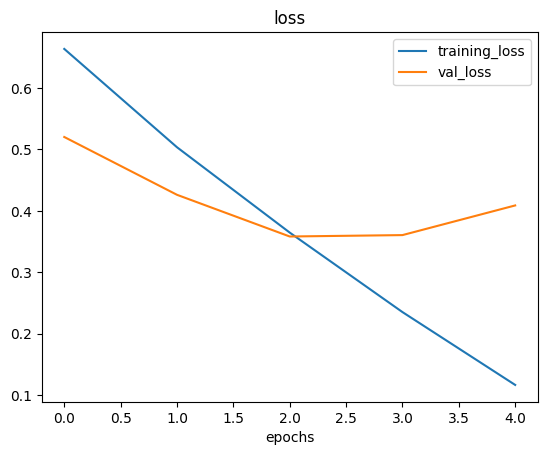

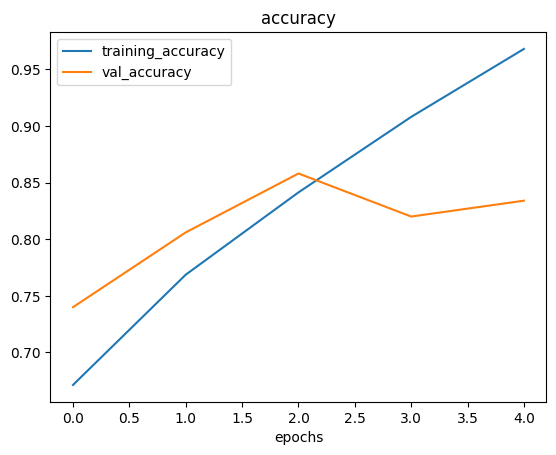

In [ ]:
plot_loss_curves(history_4)

**Induce the overfitting**

1.Increase the number of conv layers.
2.Increase the number of conv filters.
3.Add another dense layer to the output of our flattened layer.

**Reduce overfittng**

1.Add data augumentation.
2.Add regularization(such as MaxPool2D)
3.Add more data..


In [ ]:
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_5.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_5=model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 116ms/step - loss: 0.5879 - accuracy: 0.6860 - val_loss: 0.4529 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4743 - accuracy: 0.7813 - val_loss: 0.3867 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4153 - accuracy: 0.8187 - val_loss: 0.3481 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4187 - accuracy: 0.8147 - val_loss: 0.3752 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3836 - accuracy: 0.8247 - val_loss: 0.3922 - val_accuracy: 0.8080


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

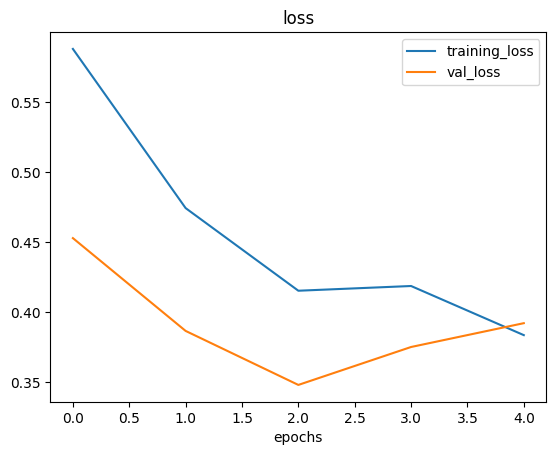

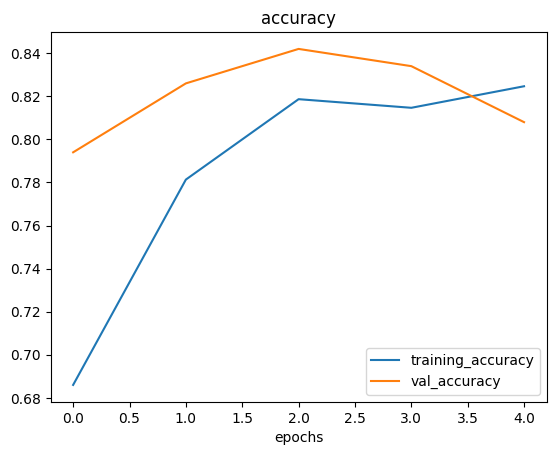

In [ ]:
plot_loss_curves(history_5)

# Opening our bag of tricks and finding data augmentaion.

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                          #  width_shift_range=0.2,
                                          #  height_shift_range=0.3,
                                           horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
# Non augmented batches
print('Non augmented training data:')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary',
                                           shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,lables=train_data.next()
augmented_images,augmented_lables=train_data_augmented.next()
print(lables)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


showing image number: 0


(-0.5, 223.5, 223.5, -0.5)

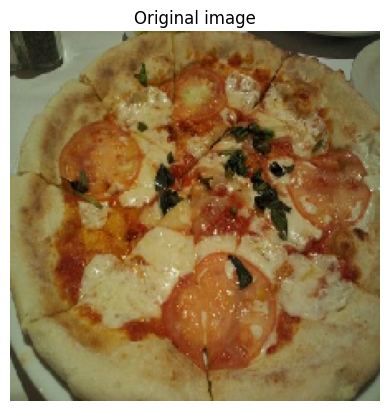

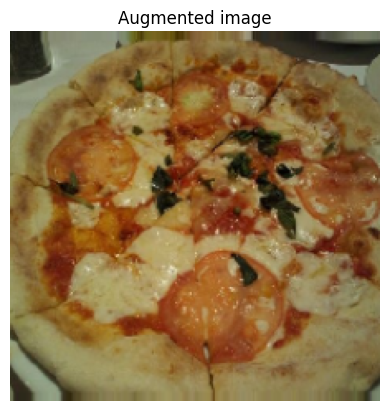

In [ ]:
import random
random_number=random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
model_6=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_6.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,)

Epoch 1/5
47/47 [==============================] - 22s 428ms/step - loss: 0.7360 - accuracy: 0.5627 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 19s 406ms/step - loss: 0.7007 - accuracy: 0.4653 - val_loss: 0.6727 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 20s 426ms/step - loss: 0.7089 - accuracy: 0.4907 - val_loss: 0.6690 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 19s 414ms/step - loss: 0.6749 - accuracy: 0.5573 - val_loss: 0.6352 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 20s 412ms/step - loss: 0.6691 - accuracy: 0.5753 - val_loss: 0.6614 - val_accuracy: 0.7320


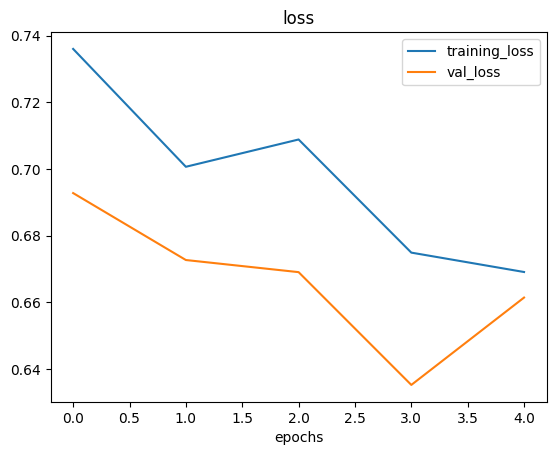

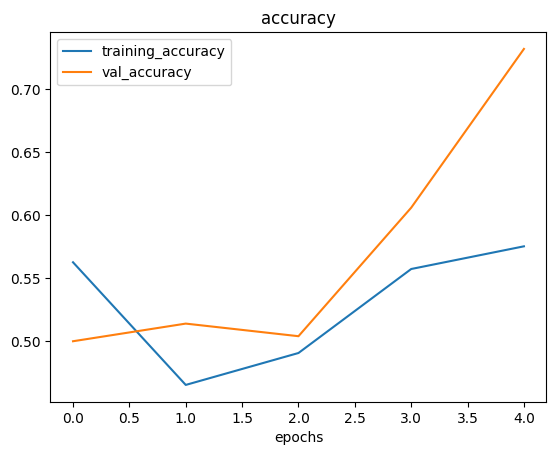

In [ ]:
plot_loss_curves(history_6)

**Shuffing the data**

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)


Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_7.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])
history_7=model_7.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,)

Epoch 1/5
47/47 [==============================] - 22s 443ms/step - loss: 0.6823 - accuracy: 0.5820 - val_loss: 0.5889 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 21s 443ms/step - loss: 0.5949 - accuracy: 0.6833 - val_loss: 0.4828 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 21s 436ms/step - loss: 0.5743 - accuracy: 0.7100 - val_loss: 0.4264 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5229 - accuracy: 0.7560 - val_loss: 0.4060 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 20s 427ms/step - loss: 0.5022 - accuracy: 0.7527 - val_loss: 0.3632 - val_accuracy: 0.8580


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2023-07-28 14:29:06--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15590 (15K) [text/plain]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]  15.22K  --.-KB/s    in 0.02s   

2023-07-28 14:29:06 (640 KB/s) - ‘03-steak.jpeg’ saved [15590/15590]



In [ ]:
import matplotlib
steak=mpimg.imread("03-steak.jpeg")

(-0.5, 3023.5, 4031.5, -0.5)

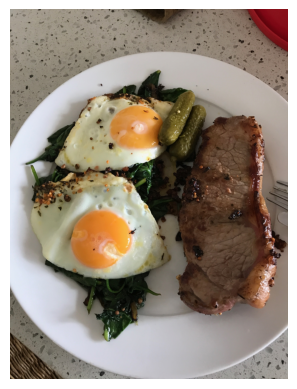

In [ ]:
plt.imshow(steak);
plt.axis(False)

In [7]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file('03-steak.jpeg')
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [ ]:
steak=load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 239ms/step


array([[0.8844984]], dtype=float32)

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [8]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


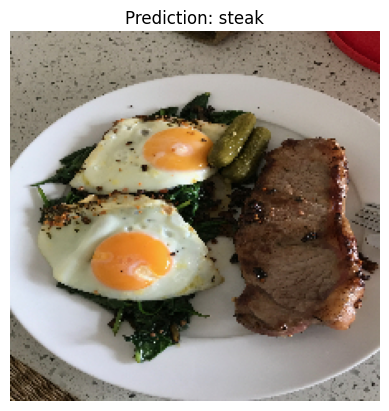

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

# MultiClass Classification.

In [9]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-29 15:09:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.5MB/s    in 23s     

2023-07-29 15:09:57 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [11]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [12]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['815302.jpg']
Image shape: (512, 512, 3)


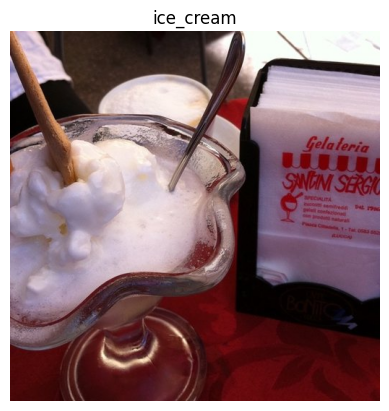

In [13]:
import random
img =view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

# 2. Preprocess the data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Base_line Model

In [15]:
model_8=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_8.compile(loss="categorical_crossentropy",
                        optimizer="adam",
                        metrics=['accuracy'])

In [16]:
history_8=model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 153ms/step - loss: 2.1297 - accuracy: 0.2267 - val_loss: 1.9589 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 33s 140ms/step - loss: 1.8649 - accuracy: 0.3657 - val_loss: 1.9407 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 33s 139ms/step - loss: 1.5667 - accuracy: 0.4727 - val_loss: 1.9652 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 1.0994 - accuracy: 0.6324 - val_loss: 2.3164 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 34s 145ms/step - loss: 0.5544 - accuracy: 0.8244 - val_loss: 2.9735 - val_accuracy: 0.2724


In [17]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 2.9735 - accuracy: 0.2724


[2.973518133163452, 0.27239999175071716]

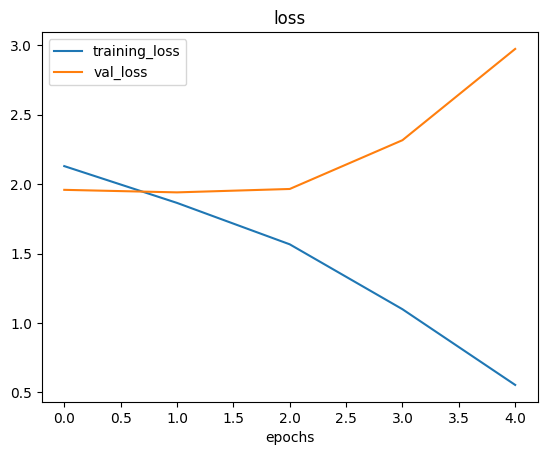

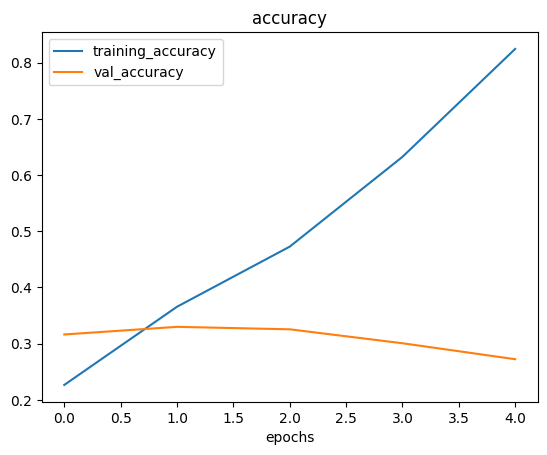

In [18]:
plot_loss_curves(history_8)

In [19]:
model_9=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(loss="categorical_crossentropy",
                        optimizer="adam",
                        metrics=['accuracy'])

In [20]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [21]:
history_9=model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.1235 - accuracy: 0.2376 - val_loss: 2.0817 - val_accuracy: 0.2360
Epoch 2/5
235/235 [==============================] - 31s 132ms/step - loss: 1.7189 - accuracy: 0.4244 - val_loss: 1.9159 - val_accuracy: 0.3136
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.2683 - accuracy: 0.5947 - val_loss: 2.0186 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.8036 - accuracy: 0.7583 - val_loss: 2.2995 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 30s 129ms/step - loss: 0.4135 - accuracy: 0.8887 - val_loss: 2.6963 - val_accuracy: 0.3096


In [22]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

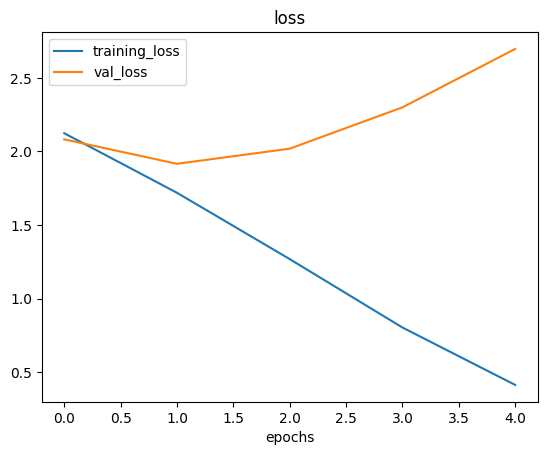

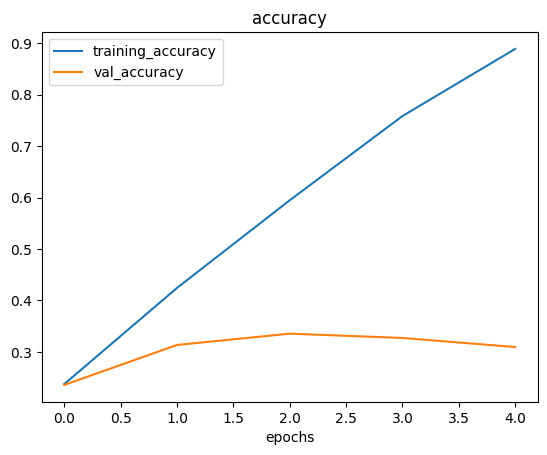

In [23]:
plot_loss_curves(history_9)

In [33]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")


Augmented training data
Found 7500 images belonging to 10 classes.


In [34]:
import tensorflow as tf

model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                        optimizer="adam",
                        metrics=['accuracy'])

In [ ]:
history_10=model_10.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 567ms/step - loss: 2.0119 - accuracy: 0.2927 - val_loss: 1.8647 - val_accuracy: 0.3576
Epoch 2/5
235/235 [==============================] - 116s 493ms/step - loss: 1.9910 - accuracy: 0.3076 - val_loss: 1.9261 - val_accuracy: 0.3392
Epoch 3/5
235/235 [==============================] - 113s 479ms/step - loss: 1.9437 - accuracy: 0.3177 - val_loss: 1.9070 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 113s 480ms/step - loss: 1.9198 - accuracy: 0.3369 - val_loss: 1.8167 - val_accuracy: 0.3816
Epoch 5/5
235/235 [==============================] - 113s 482ms/step - loss: 1.9083 - accuracy: 0.3408 - val_loss: 1.7003 - val_accuracy: 0.4240


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)